In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clean the DF

In [12]:
DF = pd.read_csv('~/Rn_Weekly_NN/AEMET/Data/Daily/BCN_ZGZ_PMP_Huesca_Daily2013-2019.csv', usecols=range(1, 8))
DF['presmed'] = DF[['presMax', 'presMin']].mean(axis=1)
DF['fecha'] = pd.to_datetime(DF['fecha'])
DF = DF.drop(['dir', 'presMax', 'presMin'], axis=1)
DF.head()

,indicativo,fecha,tmed,velmedia,presmed
0,0076,2013-01-01,9.0,3.6,1016.7
1,9434,2013-01-01,9.0,4.2,989.0
2,9898,2013-01-01,7.5,9.2,953.0
3,9263D,2013-01-01,7.0,1.7,966.8
4,9434,2013-01-02,9.4,9.4,995.5


In [13]:
DF.describe()

,tmed,velmedia,presmed
count,9726.000000,9734.000000,9730.000000
mean,15.612605,4.069653,980.593952
std,7.118201,2.306118,24.996493
min,-3.300000,0.000000,925.400000
25%,9.900000,2.500000,958.900000
50%,15.200000,3.600000,976.650000
75%,21.500000,5.300000,1001.337500
max,33.800000,16.100000,1038.400000


In [14]:
print('How many nulls has the dataframe?', DF.isnull().sum())

How many nulls has the dataframe? indicativo     0
fecha          0
tmed          58
velmedia      50
presmed       54
dtype: int64


In [15]:
def DF_subplots2x2(df_list, xcol, ycol, titles, ylabel='', xlabel='', c='purple', save=False, v=''):
    for i in range(len(df_list)):
        ax = plt.subplot(2, 2, i+1)
        df_list[i].plot(ax=ax, x=xcol, y=ycol, style='-', color=c)
        plt.title('{}'.format(titles[i]), fontsize=16)
        plt.grid(True)
        if i == 0 or i==2:
            plt.ylabel(r'${}$'.format(ylabel), fontsize=16)
            plt.xlabel('')
        elif i == 2 or i == 3:
            plt.xlabel(r'${}$'.format(xlabel), fontsize=16)
        else:
            plt.xlabel('')
        ax.get_legend().remove()
        plt.xticks(rotation=30, fontsize=12)
        plt.tight_layout()
        if save:
            plt.savefig('../Figures/{}.png'.format('_'.join(titles) + '-' + (str(v))), bbox_inches='tight')

In [16]:
BCN = DF[DF['indicativo'] == '0076']
NVR = DF[DF['indicativo'] == '9263D']
ZGZ = DF[DF['indicativo'] == '9434']
HSC = DF[DF['indicativo'] == '9898']

In [17]:
arr_plts = [BCN, NVR, ZGZ, HSC]
arr_str = ['BCN', 'NVR', 'ZGZ', 'HSC']

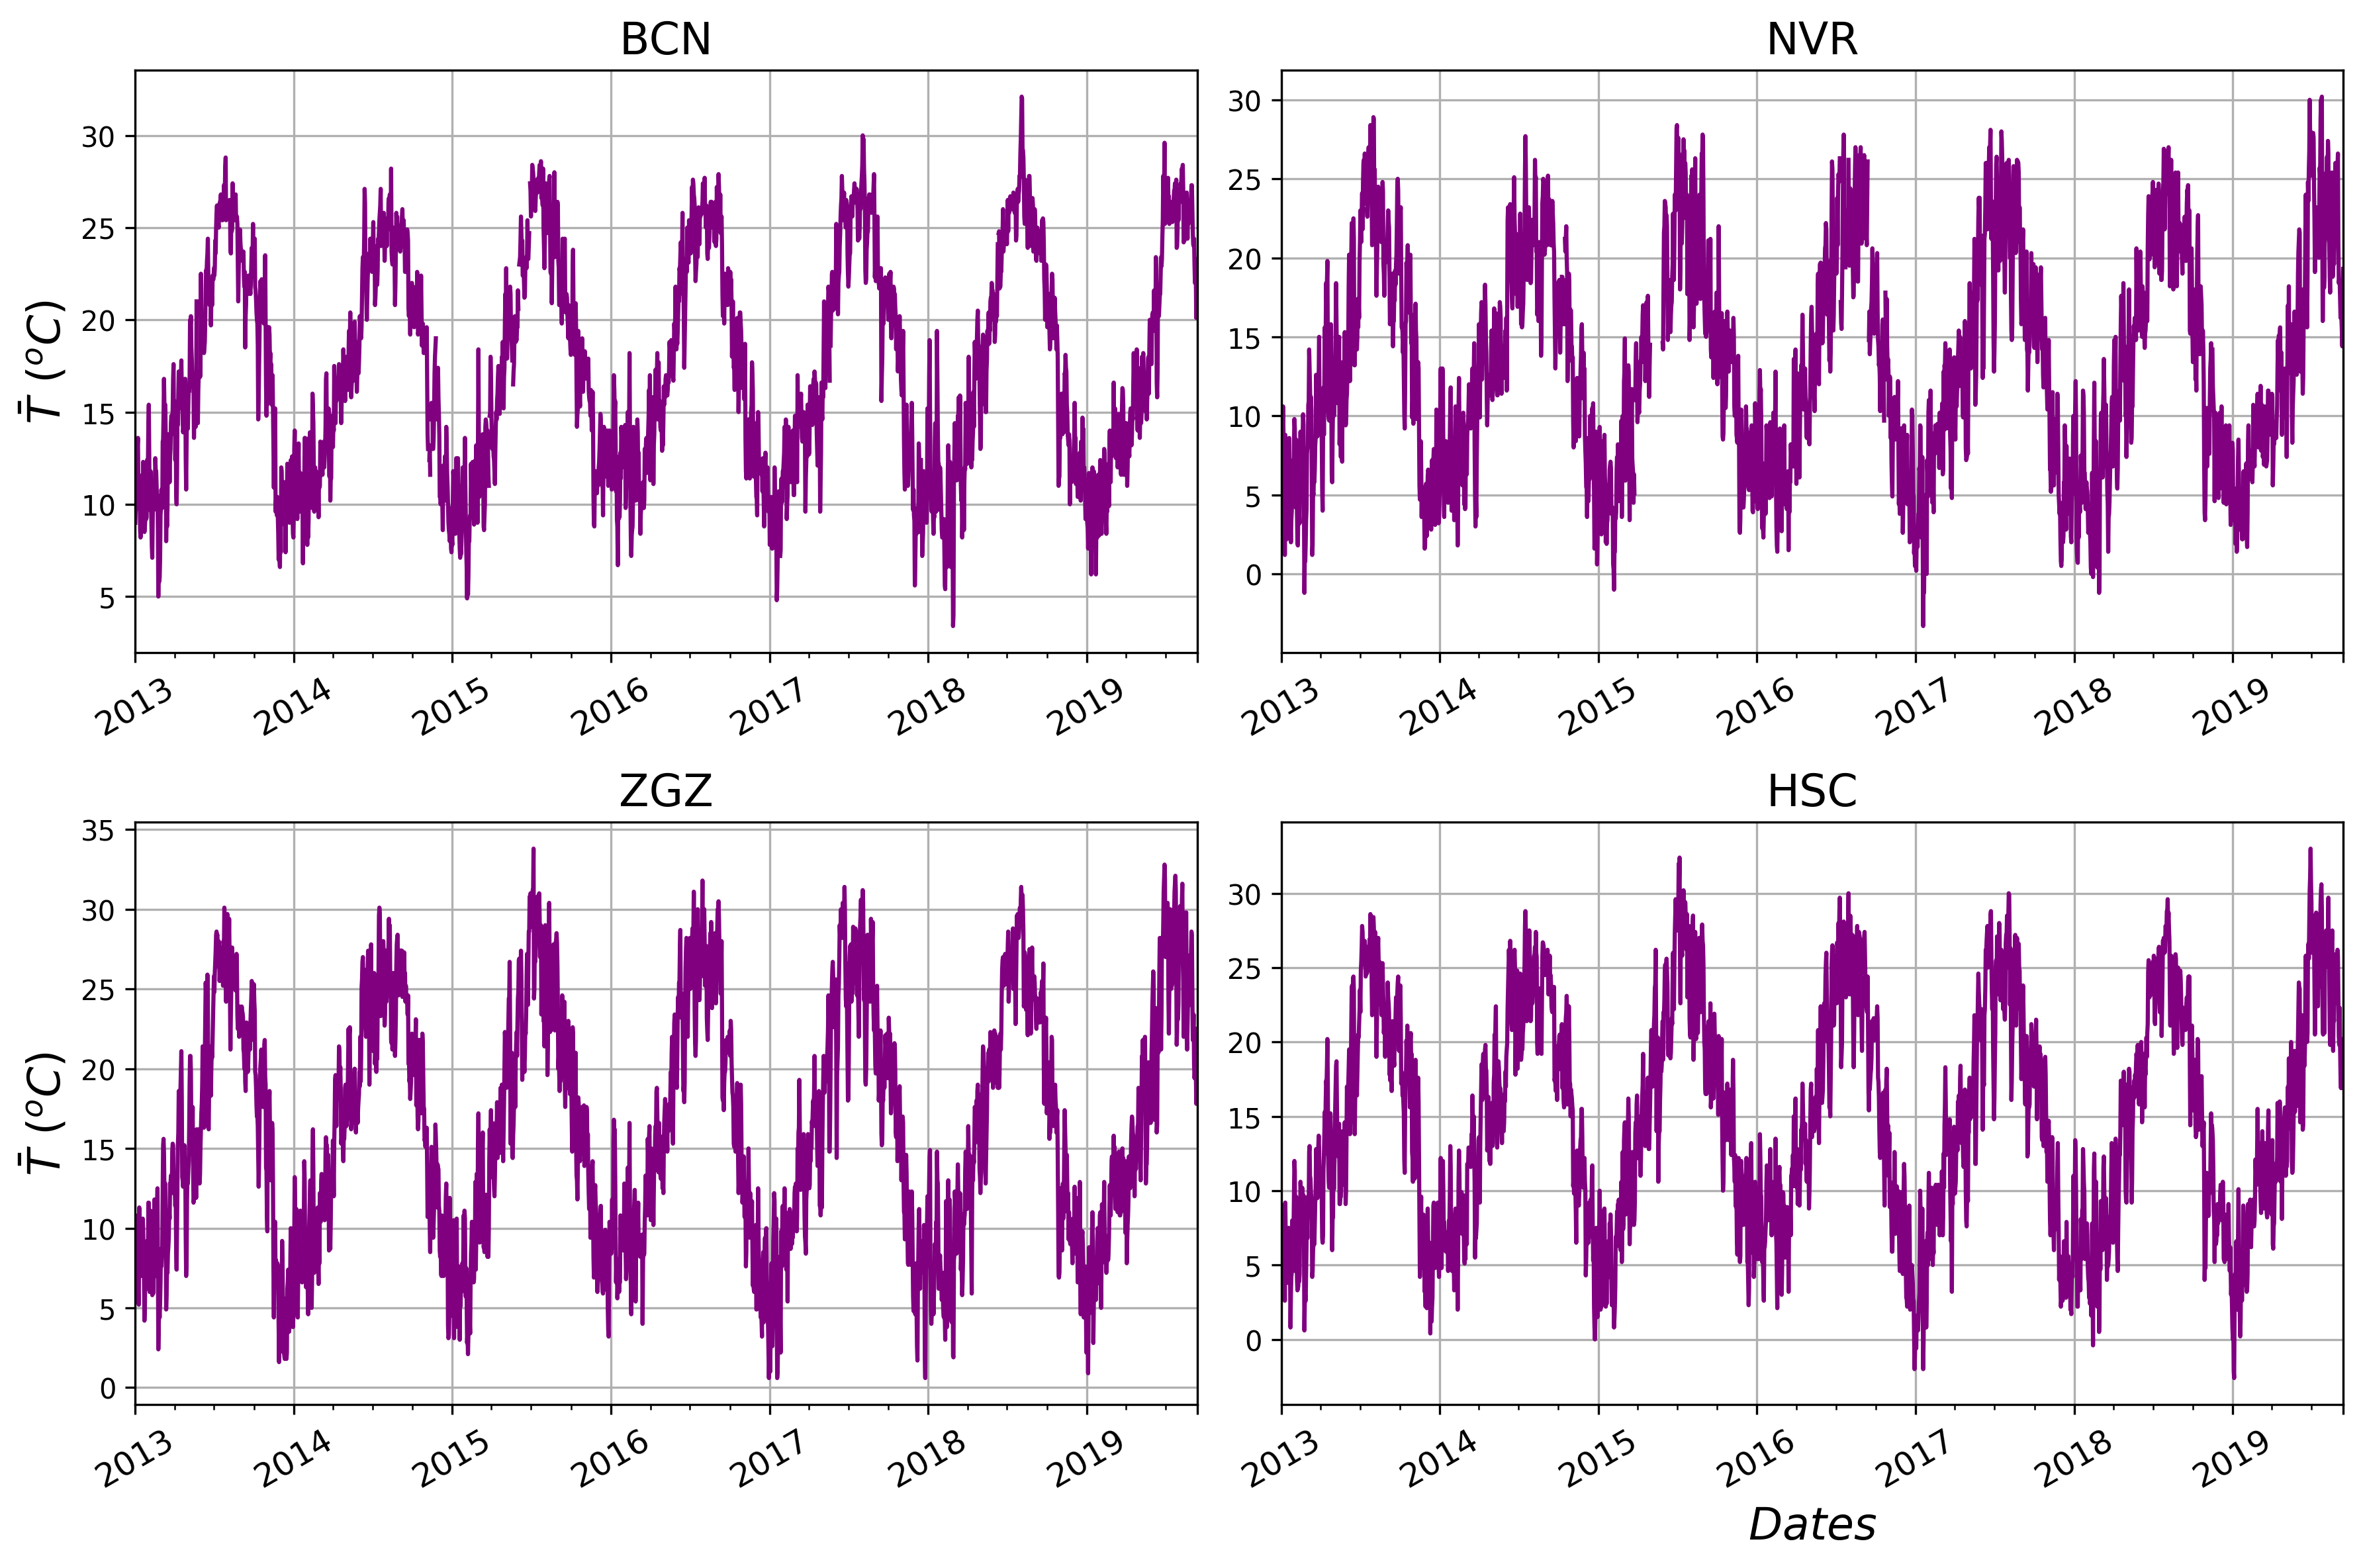

In [18]:
plt.figure(1, figsize=(12, 8), dpi=300)
DF_subplots2x2(arr_plts, 'fecha', 'tmed', arr_str, ylabel=r'\bar{T}\ (^o C)', xlabel='Dates', save=False, v='T')

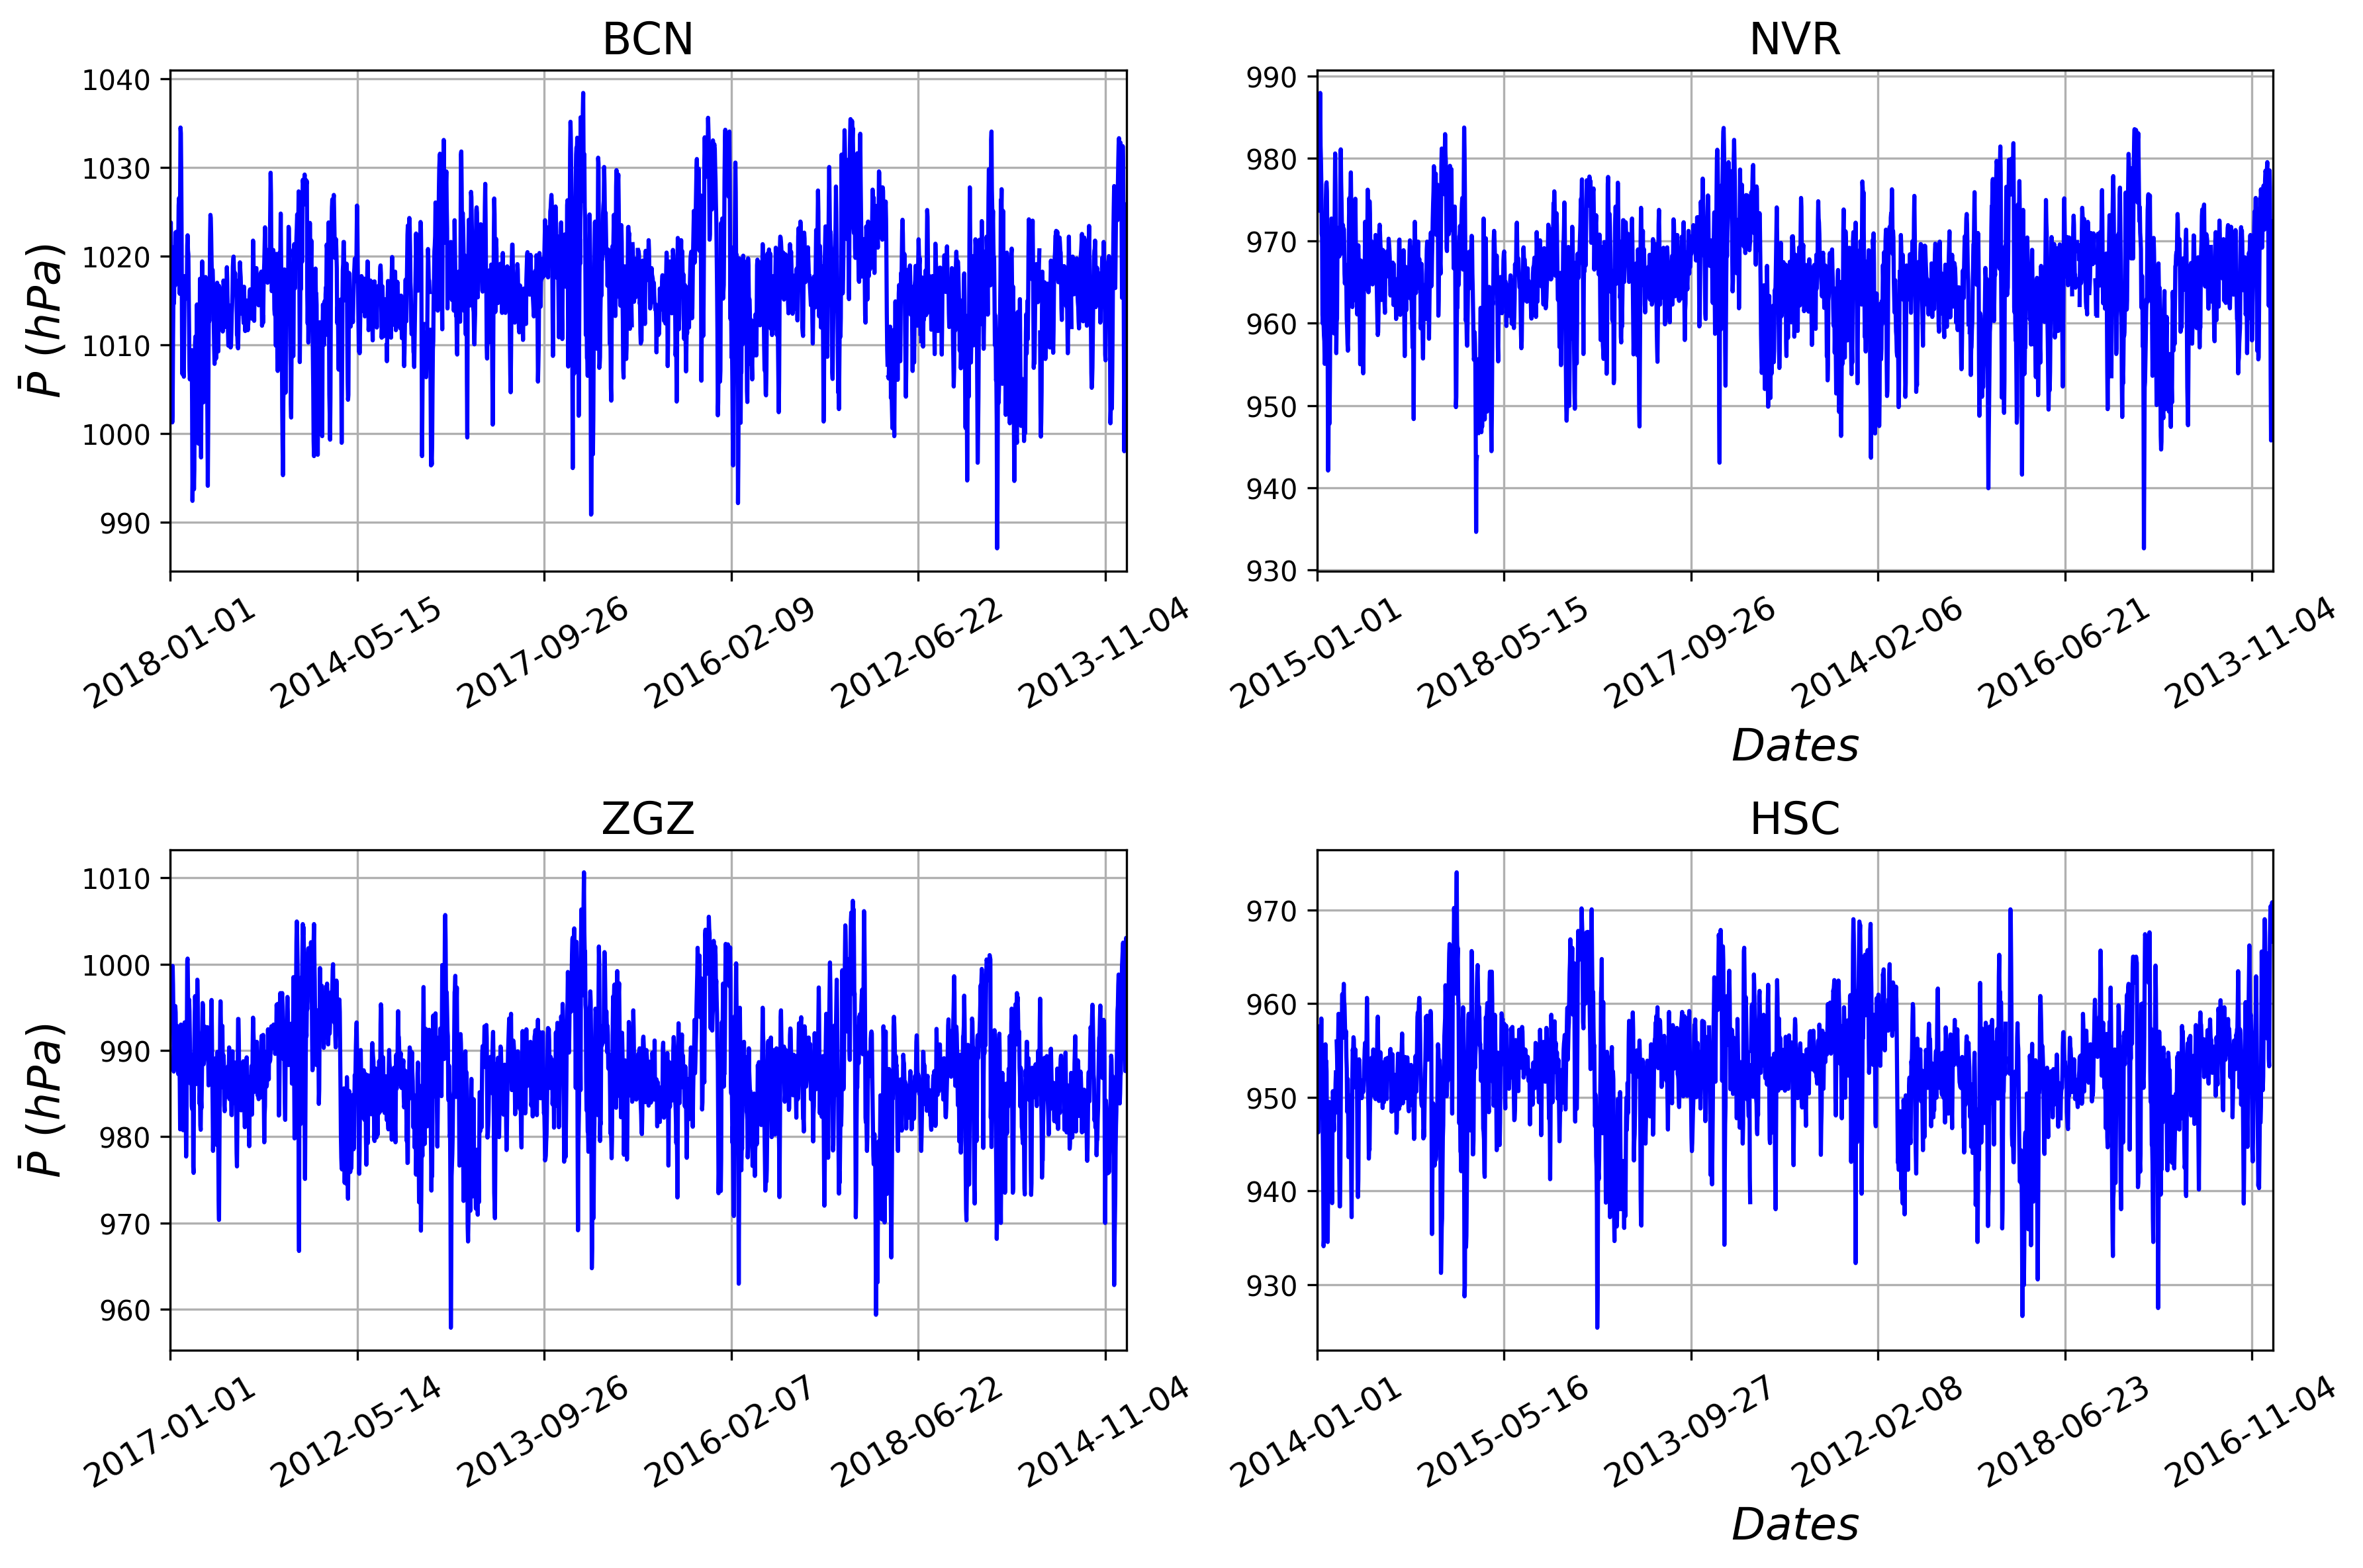

In [9]:
plt.figure(2, figsize=(12, 8), dpi=300)
DF_subplots2x2(arr_plts, 'fecha', 'presmed', arr_str, ylabel=r'\bar{P}\ (hPa)', xlabel='Dates', save=False, v='P', c='b')

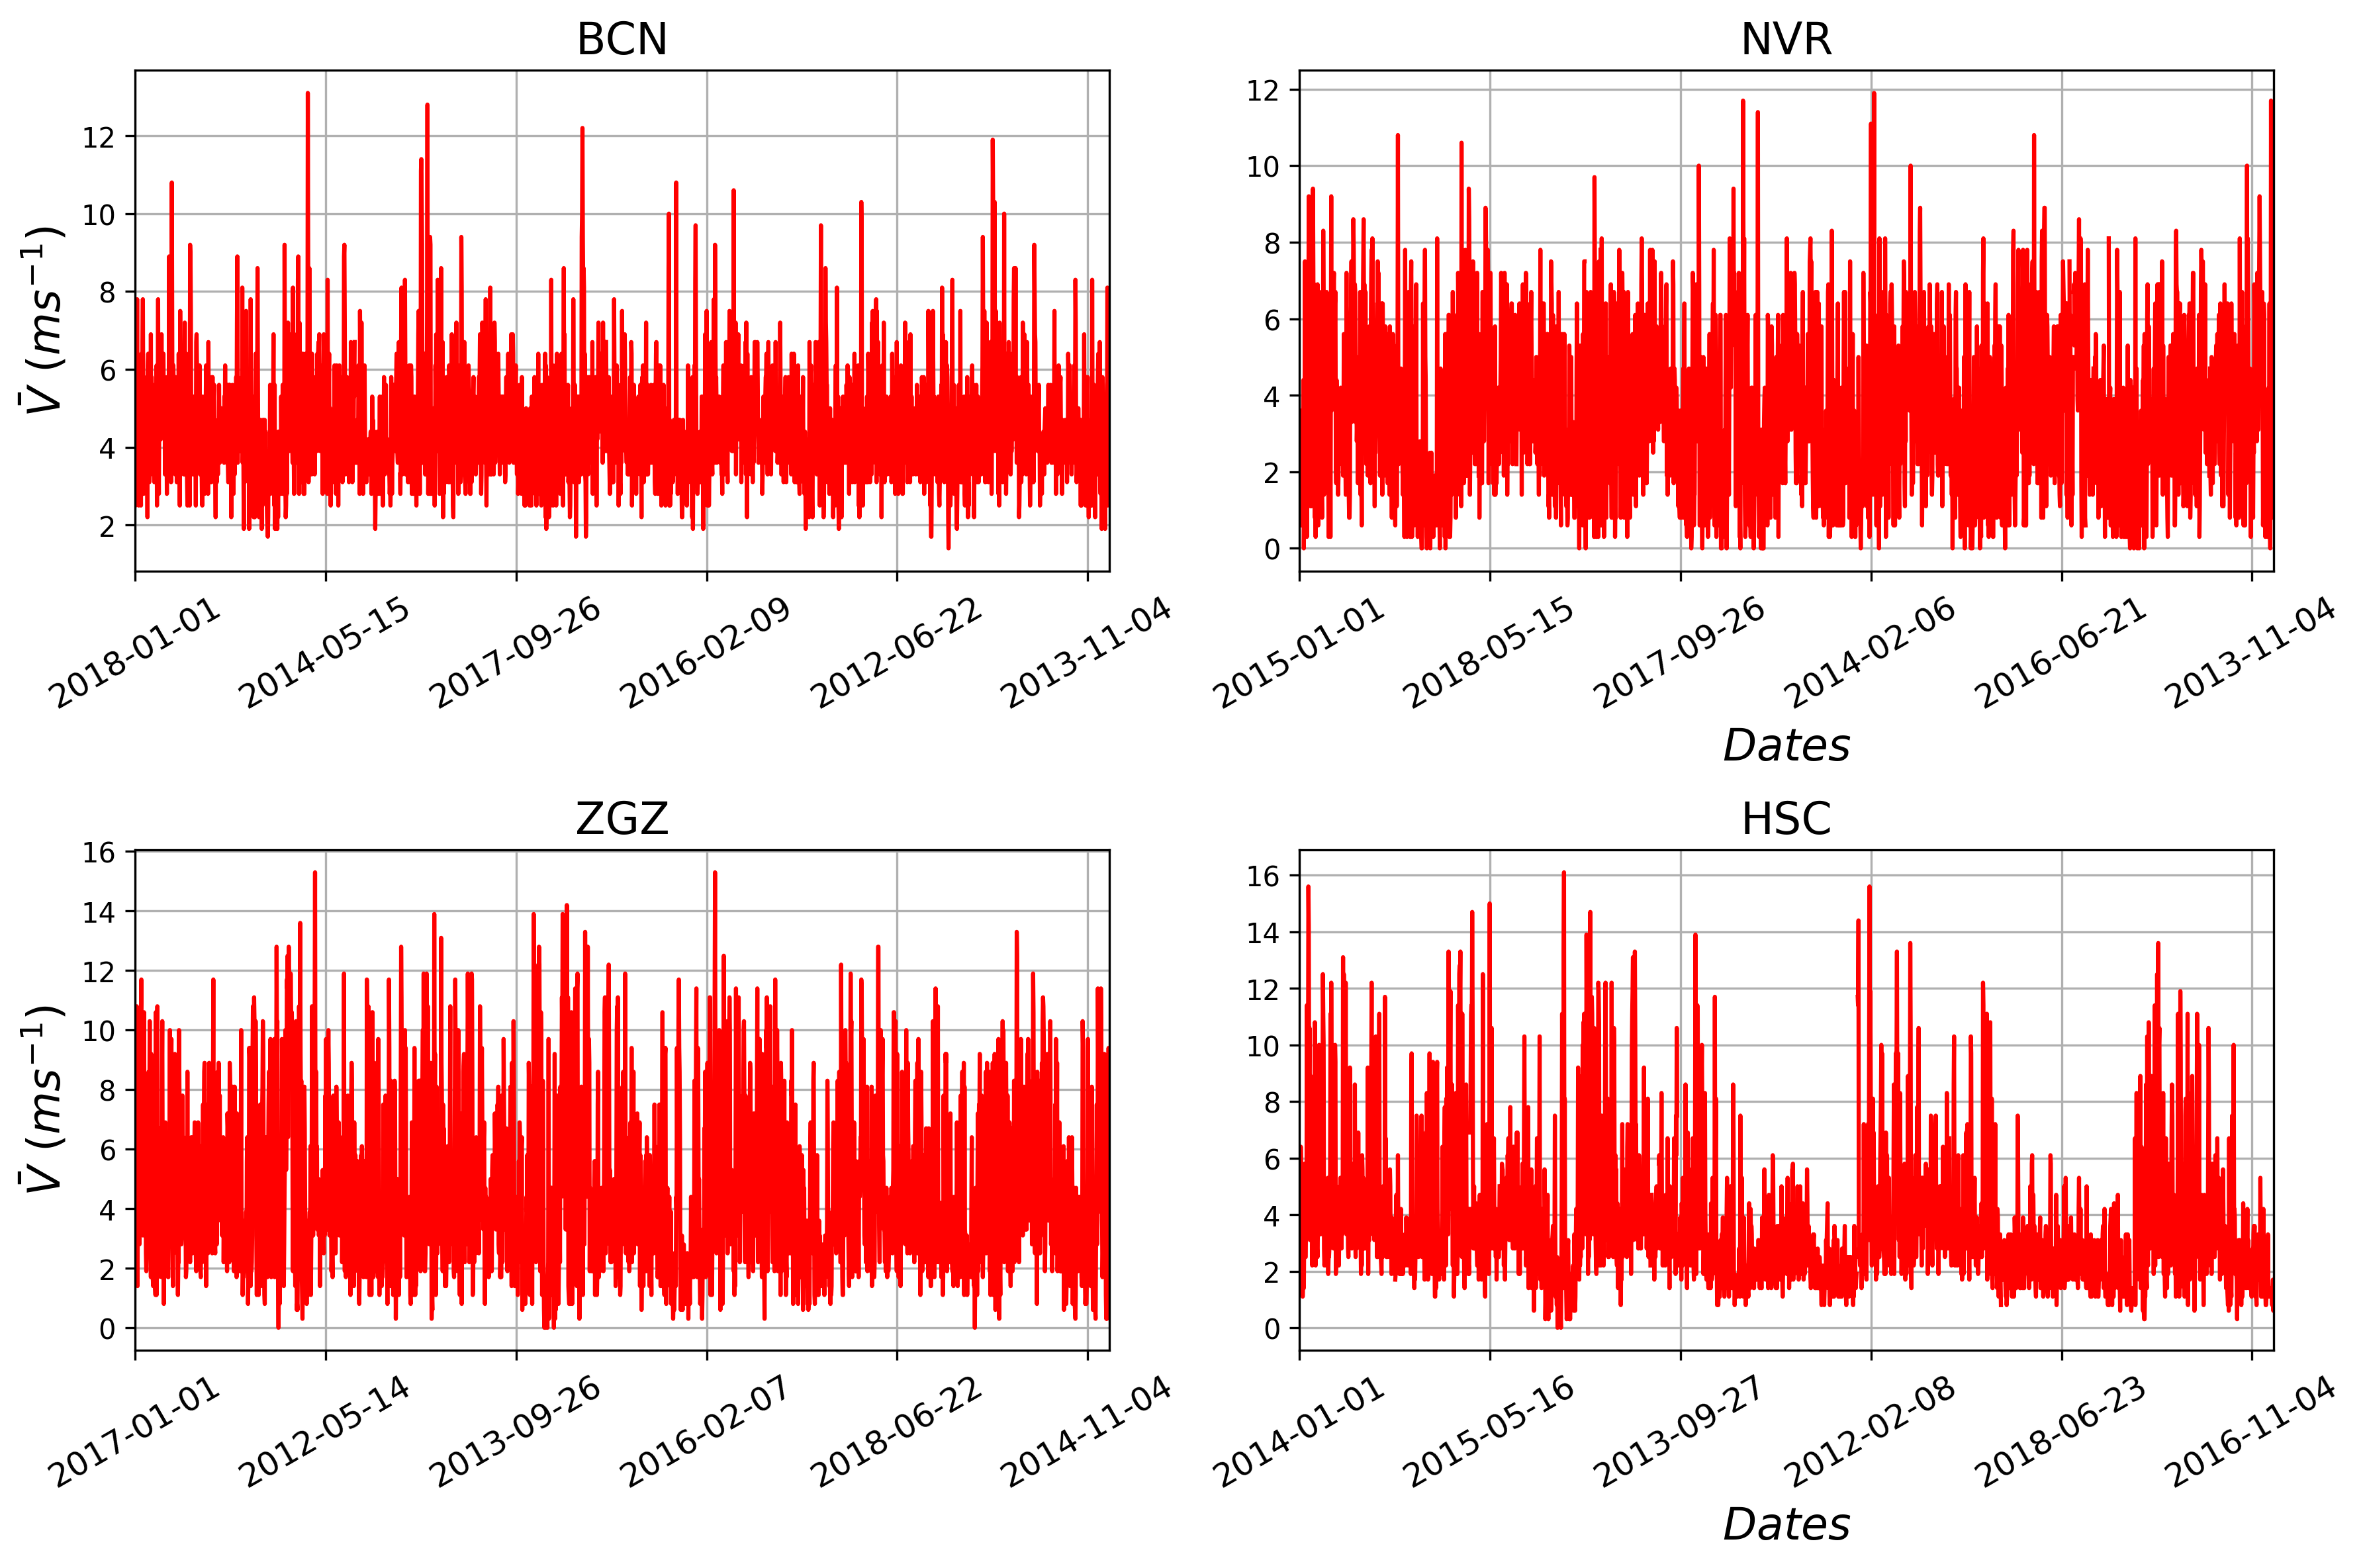

In [10]:
plt.figure(3, figsize=(12, 8), dpi=300)
DF_subplots2x2(arr_plts, 'fecha', 'velmedia', arr_str, ylabel=r'\bar{V}\ (ms^{-1})', xlabel='Dates', save=False, v='V', c='r')

## Nulls values study

### BCN

In [60]:
BCN[(BCN['tmed'].isnull())]['tmed'].isnull().sum()

14

In [61]:
BCN[(BCN['presmed'].isnull())]['presmed'].isnull().sum()

14

In [62]:
BCN[(BCN['velmedia'].isnull())]['velmedia'].isnull().sum()

14

In [63]:
BCN_dropna = BCN[(BCN['fecha'] > '2013-07-07') & (BCN['fecha'] < '2019-07-21')].sort_values(['fecha']).dropna()

### PMP

In [64]:
NVR[(NVR['tmed'].isnull())]['tmed'].isnull().sum()

44

In [65]:
NVR[(NVR['presmed'].isnull())]['presmed'].isnull().sum()

20

In [66]:
NVR[(NVR['velmedia'].isnull())]['velmedia'].isnull().sum()

16

In [67]:
NVR_dropna = NVR[(NVR['fecha'] > '2013-07-07') & (NVR['fecha'] < '2019-07-21')].sort_values(['fecha']).dropna()

### HSC

In [68]:
HSC[(HSC['tmed'].isnull())]['tmed'].isnull().sum()

0

In [69]:
HSC[(HSC['presmed'].isnull())]['presmed'].isnull().sum()

20

In [70]:
HSC[(HSC['velmedia'].isnull())]['velmedia'].isnull().sum()

19

In [71]:
HSC_dropna = HSC[(HSC['fecha'] > '2013-07-07') & (HSC['fecha'] < '2019-07-21')].sort_values(['fecha']).dropna()

### ZGZ

In [72]:
ZGZ[(ZGZ['tmed'].isnull())]['tmed'].isnull().sum()

0

In [73]:
ZGZ[(ZGZ['presmed'].isnull())]['presmed'].isnull().sum()

0

In [74]:
ZGZ[(ZGZ['velmedia'].isnull())]['velmedia'].isnull().sum()

1

In [75]:
ZGZ_dropna = ZGZ[(ZGZ['fecha'] > '2013-07-07') & (ZGZ['fecha'] < '2019-07-21')].sort_values(['fecha']).dropna()

### Fill nulls with the avg value per month

In [48]:
BCN = BCN[(BCN['fecha'] >= '2013-07-07') & (BCN['fecha'] <= '2019-07-21')].sort_values(['fecha'])
BCN[BCN['tmed'].isnull()]['tmed']

2703   NaN
2705   NaN
2723   NaN
2772   NaN
3262   NaN
3479   NaN
3533   NaN
3635   NaN
5936   NaN
6121   NaN
6400   NaN
7233   NaN
7948   NaN
Name: tmed, dtype: float64

In [46]:
def fill_avg_per_month(DF):
    DF['fecha'] = pd.to_datetime(DF['fecha'])
    output = DF.groupby([DF['fecha'].dt.year, DF['fecha'].dt.month]).transform(lambda x: x.fillna(x.mean()))
    output['fecha'] = DF['fecha']
    return output

In [65]:
out = fill_avg_per_month(BCN)
out.iloc[1800]

indicativo                   0076
tmed                      22.8586
velmedia                      6.9
presmed                    1009.7
fecha         2018-06-11 00:00:00
Name: 7948, dtype: object